In [603]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file = 'productos.xlsx'
data = pd.ExcelFile(file)
df = data.parse('data')
df = pd.DataFrame(df1)

In [604]:
df.dropna(inplace=True)
df.drop(['prod_id','prod_icon'], axis=1, inplace=True)
df.head(5)

,date,prod_name,prod_name_long,prod_brand,category,subcategory,tags,prod_unit_price,prod_units,prod_source,source_type
0,20190609,Limpia tapicería en espuma Binner,Limpia tapicería en espuma Binner x 400ml,BINNER,Supermercado,Aseo de hogar,Alfombras,15590,Unidades,VERDE,1
1,20190609,Limpia tapicería y alfombras Binner,Limpia tapicería y alfombras Binner x 500ml,BINNER,Supermercado,Aseo de hogar,Alfombras,13993,Unidades,VERDE,1
2,20190609,Limpiador Dr. Beckmann alfombras 2en1 poder oxi,Limpiador Dr. Beckmann alfombras 2en1 poder ox...,DR.BECKMANN,Supermercado,Aseo de hogar,Alfombras,16513,Unidades,VERDE,1
3,20190609,Aceite Bon Aire eléctrico perfume flores,Aceite Bon Aire eléctrico perfume flores x 25 ml,BONAIRE,Supermercado,Aseo de hogar,Ambientadores,14990,Unidades,VERDE,1
4,20190609,Ambientador Aire Varitas Bambú Bonaire 2 Repue...,Ambientador Aire Varitas Bambú Bonaire 2 Repue...,BONAIRE,Supermercado,Aseo de hogar,Ambientadores,34990,Unidades,VERDE,1


In [605]:
indices = df[df['prod_unit_price'].str.contains(',', na=False)].index
indices

Int64Index([15821, 15841, 15845, 15852], dtype='int64')

In [606]:
for n in indices:
    df.loc[n,'prod_unit_price'] = df.loc[n,'prod_unit_price'].replace(",",".")

In [607]:
df['prod_unit_price'] = df['prod_unit_price'].astype('float64').round(decimals=0)

In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25042 entries, 0 to 25637
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             25042 non-null  int64  
 1   prod_name        25042 non-null  object 
 2   prod_name_long   25042 non-null  object 
 3   prod_brand       25042 non-null  object 
 4   category         25042 non-null  object 
 5   subcategory      25042 non-null  object 
 6   tags             25042 non-null  object 
 7   prod_unit_price  25042 non-null  float64
 8   prod_units       25042 non-null  object 
 9   prod_source      25042 non-null  object 
 10  source_type      25042 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 2.9+ MB


In [609]:
df['date'].unique()

array([20190609, 20190709, 20191101, 20200220], dtype=int64)

In [610]:
df['date'].replace({
    20190609:'2019-06-09',
    20190709:'2019-07-09',
    20191101:'2019-11-01',
    20200220: '2020-02-20'
}, inplace=True)

#### ANALISIS EXPLORATORIO

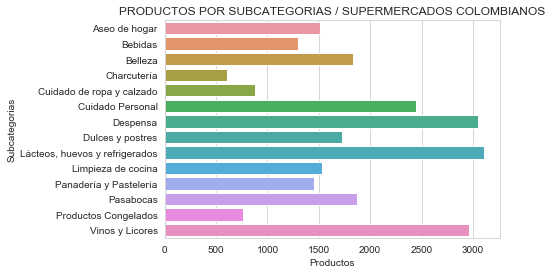

In [611]:
g = sns.countplot(data=df, y='subcategory')
g.set(xlabel='Productos', ylabel='Subcategorias', title='PRODUCTOS POR SUBCATEGORIAS / SUPERMERCADOS COLOMBIANOS')
plt.show()

Para el analisis exploratorio como primera medida se centrara en las subcategorias y las ventanas que estas registran en los diferentes supermercados de Colombia. Como resultado encontramos que las subcategorias que muestran un mayor numero de ventas son. Vinos y Licores, Despensa, Lacteos-huevos-refrigerados, ciudado personal.

C:\Users\Usurio\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


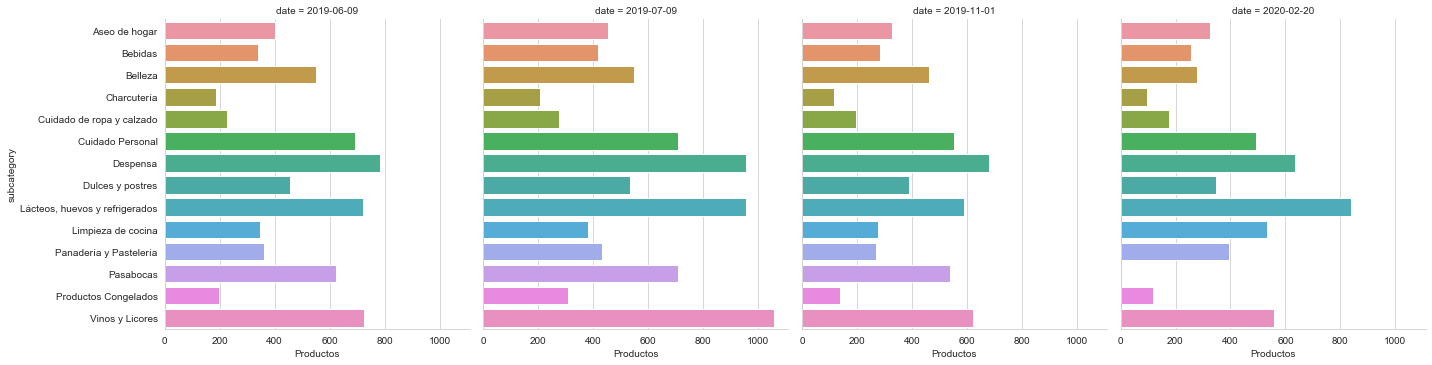

In [612]:
g = sns.catplot(data=df,y='subcategory',col='date', kind='count', ax=ax)
g.set(xlabel='Productos')
plt.show()

Luego de realizar en analisis en total para un periodo de tiempo, se estudia el comportamiento de estos en diferentes cortes para los años en curso. Podemos observar que se mantiene la tendencia de ventas para las subcategorias anteriormente mencionadas, las graficas muestran que para los cortes 2019-06-09/ 2019-11-01 se registraron menores ventas en general para todas las subcateogiras mientras que en los cortes 2019-07-09/2020-02-20 hubo un repunte de ventas llegando a las 1000 para 2019-07-09 y 800 para 2020-02-20.

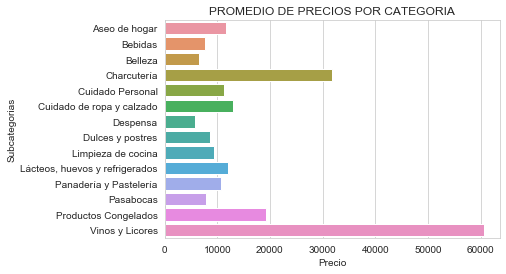

In [613]:
data = df.groupby('subcategory')['prod_unit_price'].mean()
g = sns.barplot(data.values, data.index)
g.set(xlabel='Precio', ylabel='Subcategorias', title='PROMEDIO DE PRECIOS POR CATEGORIA')
plt.show()

Para las diferentes categorias podemos encontrar que los precios promedios para estas fueron relativamente bajos con algunas excepciones como lo son la categoria de Vinos y Licores, Charcuteria que mantuvieron sus precios por encima de 30000.

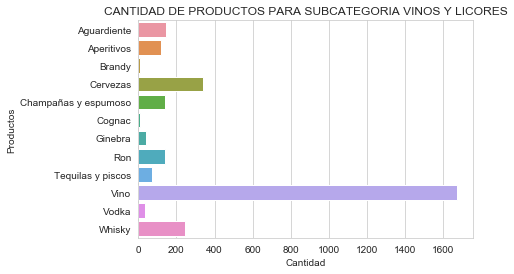

In [614]:
g = sns.countplot(data=df[df['subcategory']=='Vinos y Licores'], y='tags')
g.set(xlabel='Cantidad', ylabel='Productos', title='CANTIDAD DE PRODUCTOS PARA SUBCATEGORIA VINOS Y LICORES')
plt.show()

Para la subcategoria de Vinos y Licores la cual sera la primera en estudio por su alta afluencia en los supermercados y su variedad de productos podemos observar que la cantidad de vinos en venta es superior a los demas tipos de productos como lo son la cerveza y el whisky. Esto nos puede dar un idea de que las para los vinos encontraremos una gran cantidad de marcas en el mercado.

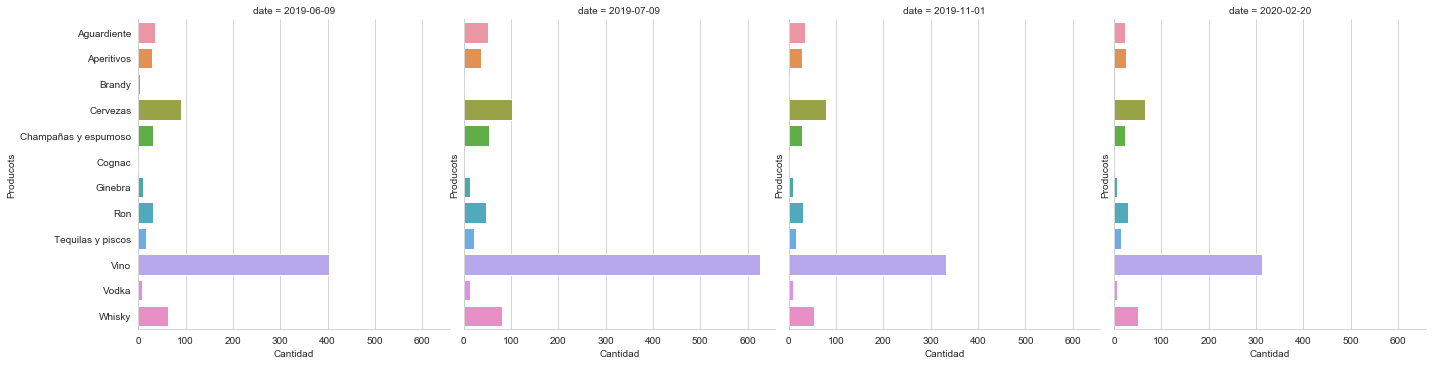

In [615]:
g = sns.catplot(data=df[df['subcategory']=='Vinos y Licores'],y='tags',col='date', kind='count')
g.set(xlabel='Cantidad',ylabel='Producots' )
plt.show()

Como vemos en el anterior grafico la cantidad de productos ofrecidos durante ciertos cortes de tiempo ya presentados se mantiene la proprocion mostrando una leve diferencia para el periodo 2019-07-09 donde la cantidad de vinos ofrecidos al publico aumento significativamente con mas de 600 productos.

In [616]:
data = df[df['tags']=='Vino'].groupby('prod_brand').prod_brand.count().sort_values(ascending=False)[:15]

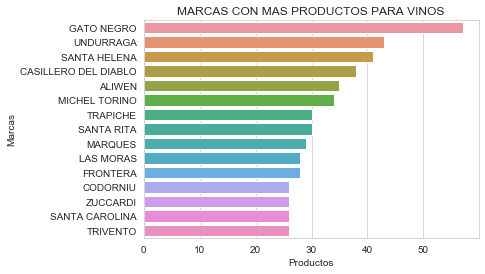

In [617]:
g = sns.barplot(data.values, data.index)
g.set(xlabel='Productos', ylabel='Marcas', title='MARCAS CON MAS PRODUCTOS PARA VINOS')
plt.show()

Dentro de grafico se muestran las 15 marcas con mayor venta de tipos de vino.Para la seccion de vinos en los supermercados encontramos que la marca dominante en la venta de este tipo de productos es la marca GATO NEGRO segida por UNDURRAGA y SANTA HELENA dentro de las primeras posiciones.

In [618]:
data_vino = df[(df['tags']=='Vino')]
data_GT = data_vino[data_vino['prod_brand']=='GATO NEGRO']
data_UD = data_vino[data_vino['prod_brand']=='UNDURRAGA']
data_SH = data_vino[data_vino['prod_brand']=='SANTA HELENA']
df_top3 = pd.concat([data_GT,data_UD,data_SH], axis=0, ignore_index=True)

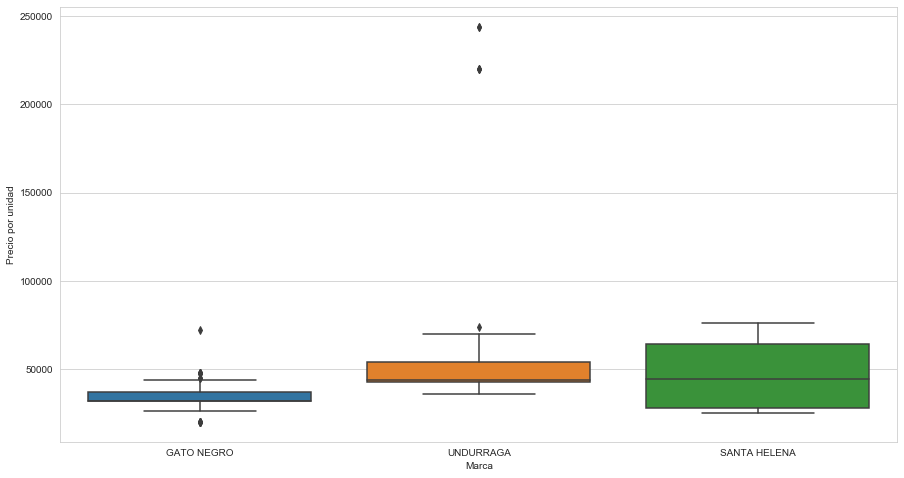

In [619]:
sns.set_style("whitegrid")
g = plt.figure(figsize=(15,8))
g = sns.boxplot(data=df_top3, x='prod_brand', y='prod_unit_price')
g.set(xlabel='Marca', ylabel='Precio por unidad')
plt.show()

Para realizar el analisis de los precios se escogieron las 3 marcas con mayores productos y se observaron las distribuciones de estos donde se puede observar que  para la marca GATO NEGRO el precio es menor a comparacion con las otras marcas y su producto mas costoso no sobrepasa el valor de 100000 mientras que  la marca UNDURRAGA tiene productos con un valor por encima de los 200000. 

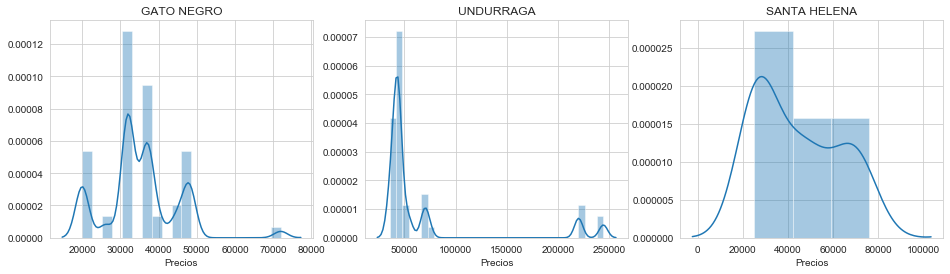

In [620]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
g = sns.distplot(data_GT['prod_unit_price'], ax=ax0)
g.set(title='GATO NEGRO', xlabel='Precios')
g = sns.distplot(data_UD['prod_unit_price'], ax=ax1)
g.set(title='UNDURRAGA', xlabel='Precios')
g = sns.distplot(data_SH['prod_unit_price'], ax=ax2)
g.set(title='SANTA HELENA', xlabel='Precios')
plt.show()

En el grafico podemos observar las distribuciones de los precios para las marcas en estudio y el comportamiento de estos

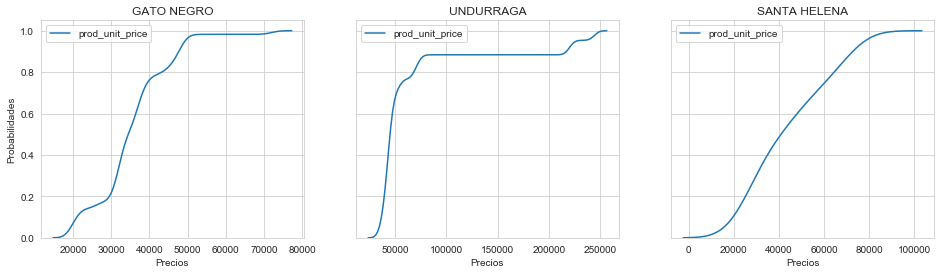

In [621]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(16,4), sharey=True)
g = sns.kdeplot(data_GT['prod_unit_price'], ax=ax0, cumulative=True)
g.set(title='GATO NEGRO', ylabel='Probabilidades', xlabel='Precios')
g = sns.kdeplot(data_UD['prod_unit_price'], ax=ax1,cumulative=True)
g.set(title='UNDURRAGA', xlabel='Precios')
g = sns.kdeplot(data_SH['prod_unit_price'], ax=ax2,cumulative=True)
g.set(title='SANTA HELENA', xlabel='Precios')
plt.show()

Otro analisis importante para los datos es el CDF, con la utilidad de este grafico podemos observar las probabilidades de los precios por debajo de un humbral. Dentro de caso de la marca GATO NEGRO podemos ver que cerca del 80% aprox de sus precios se encuentran por debajo 40000, mientras que para la marca UNDURRAGA cerca del 70% de sus precios estan pr debajo de 50000. Para los valores de la marca SANTA HELENA se ve una relacion suave donde sus precios cerca de 80% aprox estan por debajo de 65000